In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Figure size 10000x10000 with 0 Axes>

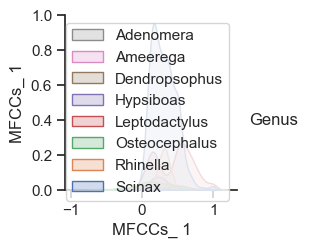

X_train shape:  (1439, 6)
X_test shape:  (5756, 6)
y_train shape:  (1439,)
y_test shape:  (5756,)


In [12]:
#importing the dataset
dataset = pd.read_csv('Q1Data.csv')
#print(dataset.head())

#checking for null values
#print(dataset.isnull().sum())

#create a dataset that contains only MFCCs_1 AND GENUS name
dataset1 = dataset[['MFCCs_ 1','Genus']]
labels=np.unique(dataset1['Genus'])
plt.figure(figsize=(100,100))
sns.set(style="ticks")
sns.pairplot(dataset1, hue="Genus")
plt.legend(labels)
plt.show()

#clearly scinax has a different distribution than the others so scinax can be classified based on MFCCs_1. 
#It is an impostant classifier for the model
#This rudimentary test was based off data visualization and not on any statistical test


# Select first six MFCC features and the Genus

X = dataset[['MFCCs_ 1','MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 5','MFCCs_ 6']]
y = dataset['Genus']

# Split the dataset (20% train, 80% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)




Steps to implement a decision tree:

1. Begin the tree with the root node, says S, which contains the complete dataset.
2. Find the best attribute in the dataset using Attribute Selection Measure- Gini Index or Entropy.
3. Divide the S into subsets that contains possible values for the best attributes.
4. Generate the decision tree node, which contains the best attribute.
5. Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf nodeClassification and Regression Tree algorithm.


In [13]:
#writing a decision tree classifier from scratch

#defining a class called decision tree node

class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def calculate_gini_index(groups, classes):
        # Count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # Sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:  # Avoid division by zero
                continue
            score = 0.0
            # Score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # Weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini


    def predict(node, row):
        if row[node.feature_index] < node.threshold:
            if isinstance(node.left, DecisionTreeNode):
                return predict(node.left, row)
            else:
                return node.left
        else:
            if isinstance(node.right, DecisionTreeNode):
                return predict(node.right, row)
            else:
                return node.right

    def accuracy_metric(actual, predicted):
        correct = sum(1 for i in range(len(actual)) if actual[i] == predicted[i])
        return correct / float(len(actual)) * 100.0

    def evaluate_algorithm(dataset, algorithm, *args):
        # Split the dataset into train and test sets
        train_set, test_set = train_test_split(dataset)
        # Apply the algorithm
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in test_set]
        accuracy = accuracy_metric(actual, predicted)
        return accuracy


    def test_split(index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def get_best_split(dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0]) - 1):
            for row in dataset:
                groups = test_split(index, row[index], dataset)
                gini = calculate_gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index': b_index, 'value': b_value, 'groups': b_groups}

    def to_terminal(group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    def split(node, max_depth, min_size, depth):
        left, right = node['groups']
        del(node['groups'])
        # Check for no split
        if not left or not right:
            node['left'] = node['right'] = to_terminal(left + right)
            return
        # Check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = to_terminal(left), to_terminal(right)
            return
        # Process left child
        if len(left) <= min_size:
            node['left'] = to_terminal(left)
        else:
            node['left'] = get_best_split(left)
            split(node['left'], max_depth, min_size, depth+1)
        # Process right child
        if len(right) <= min_size:
            node['right'] = to_terminal(right)
        else:
            node['right'] = get_best_split(right)
            split(node['right'], max_depth, min_size, depth+1)


        

In [20]:
c = DecisionTreeClassifier([X_train,y_train])

c.calculate_gini_index(X_train,y_train)


TypeError: calculate_gini_index() takes 2 positional arguments but 3 were given

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Q1Data.csv')
features = data.iloc[:, :6]
target = data['Genus']
dataset = pd.concat([features, target], axis=1).values

# Define all the functions (train_test_split, calculate_gini_index, test_split, get_best_split, to_terminal, split, predict, accuracy_metric) here

class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

def build_tree(train, max_depth, min_size):
    root = get_best_split(train)
    split(root, max_depth, min_size, 1)
    return root

def decision_tree_predict(node, row):
    if row[node.feature_index] < node.threshold:
        if isinstance(node.left, DecisionTreeNode):
            return decision_tree_predict(node.left, row)
        else:
            return node.left
    else:
        if isinstance(node.right, DecisionTreeNode):
            return decision_tree_predict(node.right, row)
        else:
            return node.right

def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = decision_tree_predict(tree, row)
        predictions.append(prediction)
    return predictions

def train_test_split(data, test_size=0.2):
    total_rows = data.shape[0]
    test_rows = int(total_rows * test_size)
    indices = np.random.permutation(total_rows)
    test_indices = indices[:test_rows]
    train_indices = indices[test_rows:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Load the dataset

train_data, test_data = train_test_split(data)


# Main section to run the classifier
train_set, test_set = train_test_split(dataset)
predicted = decision_tree(train_set, test_set, max_depth=5, min_size=10)
actual = [row[-1] for row in test_set]
accuracy = accuracy_metric(actual, predicted)
print(f'Accuracy: {accuracy}%')


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'fit'